In [1]:
# Cargar archivos de Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Almacenamos la ruta de los archivos en una variable
ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2023_MCD3735A/Módulo 1 - Extracción de datos de diferentes fuentes/'

# Archivos de texto
### De texto a `DataFrame`

In [3]:
import pandas as pd

In [ ]:
# Extracción a partir de texto separado por tabular
pd.read_fwf(ruta+'texto_2.txt',header=None)

,0,1,2
0,Ana,1.0,10
1,Beto,1.1,10
2,Alfredo,6.0,9
3,Armando,5.0,9


In [ ]:
pd.read_table(ruta+'texto_2.txt',header=None)

,0,1,2
0,Ana,1.0,10
1,Beto,1.1,10
2,Alfredo,6.0,9
3,Armando,5.0,9


In [ ]:
pd.read_csv(ruta+'texto_2.txt',header=None,sep='\t')

,0,1,2
0,Ana,1.0,10
1,Beto,1.1,10
2,Alfredo,6.0,9
3,Armando,5.0,9


In [ ]:
# Extracción a partir de texto separado por comas
pd.read_table(ruta+'texto_1.txt',sep=',',header=None)

,0,1,2
0,Ana,1.0,10
1,Beto,1.1,10
2,Alfredo,6.0,9
3,Armando,5.0,9


In [ ]:
pd.read_csv(ruta+'texto_1.txt',header=None)

,0,1,2
0,Ana,1.0,10
1,Beto,1.1,10
2,Alfredo,6.0,9
3,Armando,5.0,9


### Expresiones regulares

In [ ]:
# Conversión de archivo a variable
file=open(ruta+'texto_3.txt')     # Abrir...
texto=file.read()
file.close()                      # ...despues cerrar

In [ ]:
texto

'En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocón flaco y galgo corredor. Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lantejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. El resto della concluían sayo de velarte, calzas de velludo para las fiestas, con sus pantuflos de lo mesmo, y los días de entresemana se honraba con su vellorí de lo más fino. Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta años; era de complexión recia, seco de carnes, enjuto de rostro, gran madrugador y amigo de la caza. Quieren decir que tenía el sobrenombre de Quijada, o Quesada, que en esto hay alguna diferencia en los autores 

In [ ]:
# Si ocurre un error durante la ejecución, la variable file se cierra siempre:
with open(ruta+'texto_3.txt') as file:
  texto=file.read()

In [ ]:
texto

'En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocón flaco y galgo corredor. Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lantejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. El resto della concluían sayo de velarte, calzas de velludo para las fiestas, con sus pantuflos de lo mesmo, y los días de entresemana se honraba con su vellorí de lo más fino. Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta años; era de complexión recia, seco de carnes, enjuto de rostro, gran madrugador y amigo de la caza. Quieren decir que tenía el sobrenombre de Quijada, o Quesada, que en esto hay alguna diferencia en los autores 

In [ ]:
# Separamos cada palabra de la variable de texto
texto.split()

In [ ]:
# Conteo de palabras. Expresiones regulares
import re

In [ ]:
# \w -> [a-z][A-Z][0-9][_]
# \W -> ^[\w]
# \d -> [0-9]
# \D -> ^[0-9]
# \s -> [\t\n \r]
L=re.split('\W',texto)
L

In [ ]:
# Convertimos la lista a set
S=set(L)
S.discard('') # Eliminamos el elemento vacío
S

In [ ]:
re.findall('[Ee]n',texto) # medimos la longitud de la lista resultante
len(re.findall('[Ee]n',texto))

21

In [ ]:
len(re.findall('en',texto,flags=re.I)) # re.I=Ingnorecase

21

In [ ]:
# Buscamos las palabras no repetidas del set en la variable de texto para poderlas contar
d={}
for palabra in S:
  d[palabra]=len(re.findall(palabra,texto,flags=re.I))
pd.DataFrame(d.items())

# Archivos excel

In [ ]:
# A partir de la función
pd.read_excel(ruta+'API_SI.POV.DDAY_DS2_en_excel_v2_1930012.xls')

In [ ]:
# Importamos la clase ExcelFile
from pandas import ExcelFile

In [ ]:
# A partir de la clase
obj=ExcelFile(ruta+'API_SI.POV.DDAY_DS2_en_excel_v2_1930012.xls')
obj.parse()

# Archivos JSON

In [ ]:
pd.read_json?

In [ ]:
pd.read_json(ruta+'data.json',orient='split')

,_id,categories,isActive,imageUrl,barcode,isFmcg,itemName,mrp,_created_at,_updated_at
0,OzE5vaa3p7,"[{'__type': 'Pointer', 'className': 'Category'...",True,https://firebasestorage.googleapis.com/v0/b/sh...,8908001921015,True,Anil puttu flour 500g,58,2016-10-02 13:49:03.281000+00:00,2017-02-22 08:48:09.548000+00:00
1,ENPCL8ph1p,"[{'__type': 'Pointer', 'className': 'Category'...",True,https://firebasestorage.googleapis.com/v0/b/ki...,8901725181222,True,"Yippee Magic Masala Noodles, 70 G",12,2016-10-02 13:49:03.284000+00:00,2017-02-22 08:48:09.074000+00:00


In [ ]:
_['categories'][0]

[{'__type': 'Pointer', 'className': 'Category', 'objectId': 'nebCwWd2Fr'}]

# Archivos XML

In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
archivo=ET.parse(ruta+'tabla_1.xml')
raiz=archivo.getroot()

In [ ]:
for nodo in raiz:
  print(nodo.tag,nodo.attrib,nodo.text)
  for subnodo in nodo:
    print(subnodo.tag,subnodo.attrib,subnodo.text)

country {'name': 'Liechtenstein'} 
        
rank {} 1
year {} 2008
gdppc {} 141100
country {'name': 'Singapore'} 
        
rank {} 4
year {} 2011
gdppc {} 59900
country {'name': 'Panama'} 
        
rank {} 68
year {} 2011
gdppc {} 13600


In [ ]:
d={}
for nodo in raiz:
  d[nodo.tag]=[]
  for subnodo in nodo:
    d[subnodo.tag]=[]

In [ ]:
for nodo in raiz:
  d[nodo.tag].append(nodo.attrib['name'])
  for subnodo in nodo:
    d[subnodo.tag].append(subnodo.text)
pd.DataFrame(d)

,country,rank,year,gdppc
0,Liechtenstein,1,2008,141100
1,Singapore,4,2011,59900
2,Panama,68,2011,13600


In [ ]:
data = [] 
for nodo in raiz:
  country_data = {}
  country_data['country'] = nodo.attrib['name']
  for subnodo in nodo:
    country_data[subnodo.tag] = subnodo.text
  data.append(country_data)
 
df = pd.DataFrame(data)
df

,country,rank,year,gdppc
0,Liechtenstein,1,2008,141100
1,Singapore,4,2011,59900
2,Panama,68,2011,13600


In [ ]:
archivo=ET.parse(ruta+'tabla_2.xml')
raiz=archivo.getroot()

In [ ]:
for nodo in raiz:
  print(nodo.tag)
  for subnodo in nodo:
    print(subnodo.tag, subnodo.attrib,subnodo.text)

documents
document {'KEY': 'e95a9a6c790ecb95e46cf15bee517651', 'web': 'www.ubm/doc004.com'} Nevertheless, high and based on experience, fluctuating throughput levels contradict high reliability.

        
document {'KEY': 'bc360cfbafc39970587547215162f0db', 'web': 'www.ubm/doc006.com'} As long as the production is not conducted on the basis of concrete customer orders, the companies objectives

        
document {'KEY': '19e71144c50a8b9160b3f0955e906fce', 'web': 'www.ubm/doc005.com'} Many companies today, in different fields of operations and sizes, have access to a vast amount of data which was not available only a couple of years ago.

        
document {'KEY': '21d4af9021a174f61b884606c74d9e42', 'web': 'www.ubm/doc002.com'} A famous example of a successful prediction is by the German astronomer Johann Gottfried Galle

        
document {'KEY': '28a45eb2460899763d709ca00ddbb665', 'web': 'www.ubm/doc001.com'} A more recent example of the same kind is the prediction of the Higgs boson 

In [ ]:
data=[]
for nodo in raiz:
  for subnodo in nodo:
    d={subnodo.tag:subnodo.text}
    for k in subnodo.attrib: # subnodo.attrib.keys() # subnodo.attrib.items()
      d[k]=subnodo.attrib[k]
    data.append(d)
pd.DataFrame(data)

,document,KEY,web
0,"Nevertheless, high and based on experience, fl...",e95a9a6c790ecb95e46cf15bee517651,www.ubm/doc004.com
1,As long as the production is not conducted on ...,bc360cfbafc39970587547215162f0db,www.ubm/doc006.com
2,"Many companies today, in different fields of o...",19e71144c50a8b9160b3f0955e906fce,www.ubm/doc005.com
3,A famous example of a successful prediction is...,21d4af9021a174f61b884606c74d9e42,www.ubm/doc002.com
4,A more recent example of the same kind is the ...,28a45eb2460899763d709ca00ddbb665,www.ubm/doc001.com


---

In [ ]:
archivo='IFC-Subscriptions-and-Voting-Power-of-Member-Count.xml'
file=ET.parse(ruta+archivo)
root=file.getroot()

for nodo in root:
  for subnodo in nodo:
    print(subnodo.tag,subnodo.attrib,subnodo.text)
    for ssnodo in subnodo:
      print(ssnodo.tag,ssnodo.attrib,ssnodo.text)

---

# Archivos SHP

In [ ]:
# %conda !pip !conda
%pip install geopandas

In [5]:
import geopandas as gpd

In [ ]:
rutaCOVID='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2023_MCD3735A/Módulo 1 - Extracción de datos de diferentes fuentes/COVID_INDIA_POC-shp/'
gpd.read_file(rutaCOVID+'COVID_INDIA_POC.shx')

# Archivos imágen

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
I=plt.imread(ruta+'imagen.bmp')
I.shape

(199, 309, 4)

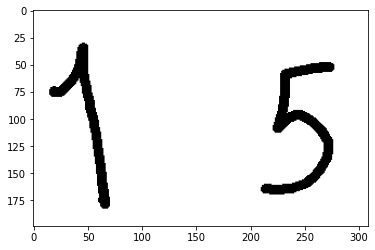

In [11]:
plt.imshow(I)

In [12]:
I[0,0,3] # Mostramos el pixel (0,0) de la última matriz

255

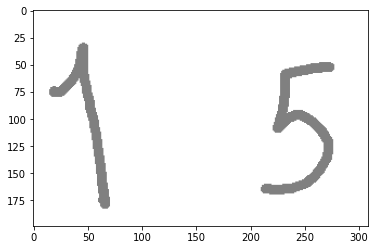

In [21]:
c=0.5*np.ones((199,309,4))
c[:,:,:3]=I[:,:,:3]/255
plt.imshow(c)

In [22]:
c[0,0,0]

1.0

In [23]:
# Obtención de una matriz en escala de grices
G=I.mean(axis=2)
G.shape

(199, 309)

In [24]:
G[0,0]

255.0

In [25]:
G=G/255
G[0,0]

1.0

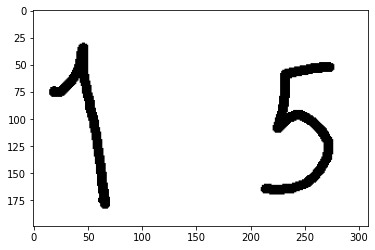

In [27]:
plt.imshow(G,cmap='gray')